In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [105]:
iris = load_iris()
x = iris.data[iris.target != 0]
y = iris.target[iris.target != 0] - 1
y = y.reshape(100, 1)

In [106]:
x = np.hstack((x, np.ones((100, 1))))

In [108]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
x_n = pca_model.fit_transform(x)

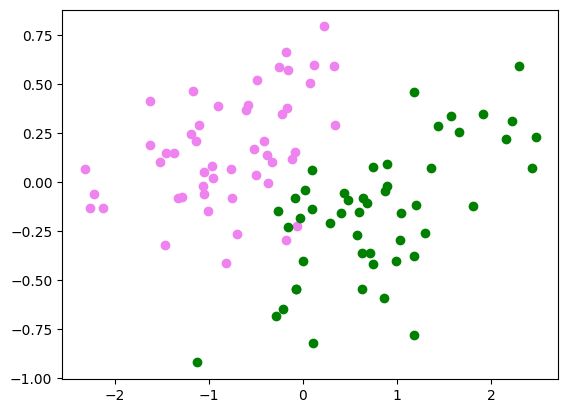

In [110]:
plt.scatter(x_n[y[:,0] == 0, 0], x_n[y[:,0] == 0, 1], c='violet')
plt.scatter(x_n[y[:,0] == 1, 0], x_n[y[:,0] == 1, 1], c='green')
plt.show()

In [130]:
w = np.array((0.2, 0.2, 0.2, 0.2, 0.2)).reshape(5, 1)
b = 0
learning_rate = 0.5 / x.shape[0]
n_iterations = 100 * x.shape[0]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x, w):
    return sigmoid(np.dot(x, w))

def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def compute_accuracy(y, y_pred):
    predictions = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(predictions == y.reshape(100, 1))
    return accuracy

for iteration in range(n_iterations):
    idx = np.random.randint(len(x))
    X_i = x[idx:idx+1]
    y_i = y[idx:idx+1]
    
    y_pred = predict(X_i, w)
    error = y_pred - y_i

    gradient_w = X_i * error
    # gradient_b = error

    w -= (learning_rate * gradient_w).T
    # b -= learning_rate * gradient_b

    if iteration % 1000 == 0 or iteration >= n_iterations-3:
        y_pred_all = predict(x, w)
        loss = compute_loss(y, y_pred_all)
        accuracy = compute_accuracy(y, y_pred_all)
        print(f"Iteration {iteration}, Loss: {loss}, Accuracy: {accuracy}")


Iteration 0, Loss: 1.4554262413081525, Accuracy: 0.5
Iteration 1000, Loss: 0.5339919641857331, Accuracy: 0.8
Iteration 2000, Loss: 0.4399618474389137, Accuracy: 0.94
Iteration 3000, Loss: 0.37846945901640255, Accuracy: 0.96
Iteration 4000, Loss: 0.3443887397575005, Accuracy: 0.92
Iteration 5000, Loss: 0.30175839778201907, Accuracy: 0.96
Iteration 6000, Loss: 0.2780309425337053, Accuracy: 0.96
Iteration 7000, Loss: 0.26185500282523205, Accuracy: 0.96
Iteration 8000, Loss: 0.24530307401132298, Accuracy: 0.96
Iteration 9000, Loss: 0.2345407914139464, Accuracy: 0.97
Iteration 9997, Loss: 0.22474029521633376, Accuracy: 0.96
Iteration 9998, Loss: 0.22557216635363048, Accuracy: 0.96
Iteration 9999, Loss: 0.2257145218407689, Accuracy: 0.96


In [131]:
w

array([[-1.85524456],
       [-1.44617625],
       [ 2.60581751],
       [ 2.51512828],
       [-0.86417787]])

In [134]:
df = pd.DataFrame(np.hstack((x, y.reshape(-1, 1), predict(x, w).reshape(-1, 1))))
df.head(), df.tail()

(     0    1    2    3    4    5         6
 0  7.0  3.2  4.7  1.4  1.0  0.0  0.062378
 1  6.4  3.2  4.5  1.5  1.0  0.0  0.133931
 2  6.9  3.1  4.9  1.5  1.0  0.0  0.166962
 3  5.5  2.3  4.0  1.3  1.0  0.0  0.331526
 4  6.5  2.8  4.6  1.5  1.0  0.0  0.229152,
       0    1    2    3    4    5         6
 95  6.7  3.0  5.2  2.3  1.0  1.0  0.845822
 96  6.3  2.5  5.0  1.9  1.0  1.0  0.837558
 97  6.5  3.0  5.2  2.0  1.0  1.0  0.788967
 98  6.2  3.4  5.4  2.3  1.0  1.0  0.929072
 99  5.9  3.0  5.1  1.8  1.0  1.0  0.841342)

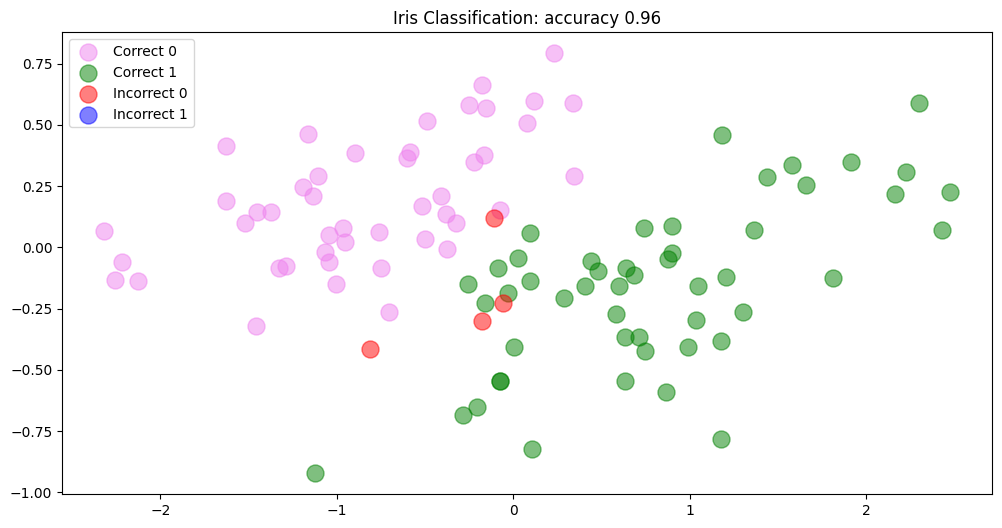

In [137]:
pred_all = (predict(x, w) >= 0.5).astype(int)
accuracy = compute_accuracy(y, y_pred_all)

plt.figure(figsize=(12, 6))

plt.scatter(x_n[(y[:, 0] == pred_all[:, 0]) & (y[:, 0] == 0), 0],
            x_n[(y[:, 0] == pred_all[:, 0]) & (y[:, 0] == 0), 1],
            c='violet',
            s=150,
            alpha=0.5,
            label='Correct 0')
plt.scatter(x_n[(y[:, 0] == pred_all[:, 0]) & (y[:, 0] == 1), 0],
            x_n[(y[:, 0] == pred_all[:, 0]) & (y[:, 0] == 1), 1],
            c='green',
            s=150,
            alpha=0.5,
            label='Correct 1')
plt.scatter(x_n[(y[:, 0] != pred_all[:, 0]) & (y[:, 0] == 0), 0],
            x_n[(y[:, 0] != pred_all[:, 0]) & (y[:, 0] == 0), 1],
            c='red',
            s=150,
            alpha=0.5,
            label='Incorrect 0')
plt.scatter(x_n[(y[:, 0] != pred_all[:, 0]) & (y[:, 0] == 1), 0],
            x_n[(y[:, 0] != pred_all[:, 0]) & (y[:, 0] == 1), 1],
            c='blue',
            s=150,
            alpha=0.5,
            label='Incorrect 1')

plt.title(F'Iris Classification: accuracy {accuracy}')
plt.legend()
plt.show()
